In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(filepath_or_buffer=r'c:\Users\aliki\Desktop\NLP\model\labeled_normalized_data.csv')

## Since the BERT tokenizers have a limit upto 512 words we need to check if our comments have more than 512 words.

In [5]:
df['count'] = df['comment'].apply(lambda x : len(x.split()))
print(df.head())

   Unnamed: 0                                            comment  source  \
0           0  As a woman you shouldn't complain about cleani...  kaggle   
1           1  boy dats cold...tyga dwn bad for cuffin dat ho...  kaggle   
2           2  Dawg!!!! You ever fuck a bitch and she start t...  kaggle   
3           3  The shit you hear about me might be true or it...  kaggle   
4           4  The shit just blows me..claim you so faithful ...  kaggle   

   label  count  
0      0     21  
1      1     13  
2      1     16  
3      1     22  
4      1     17  


## According to table below we are good to use BERT Auto Tokenizer.

c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of Words Distribution')

<Figure size 800x800 with 0 Axes>

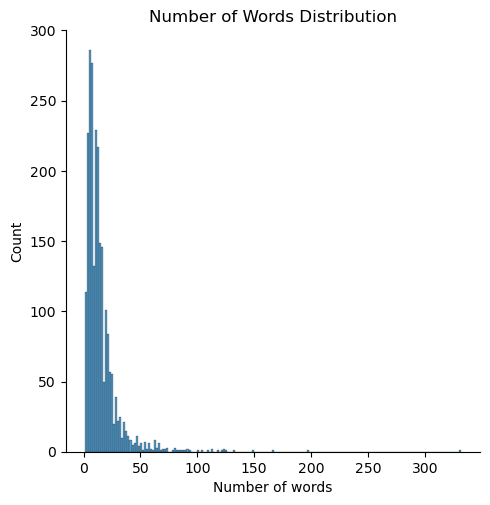

In [6]:
plt.figure(figsize=(8,8))
sns.displot(df['count'])
plt.xlabel('Number of words')   
plt.title('Number of Words Distribution')

## we are checking if all the comments have label

In [7]:
df.count()

Unnamed: 0    2398
comment       2398
source        2398
label         2398
count         2398
dtype: int64

## 691 comments were labeled as 1, which means they include offensive language.
## 1707 comments were labeled as 0, which means they don't include any offensive language.

In [14]:
df[df['label']==1].shape

(691, 5)

In [15]:
df[df['label']==0].shape

(1707, 5)

c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


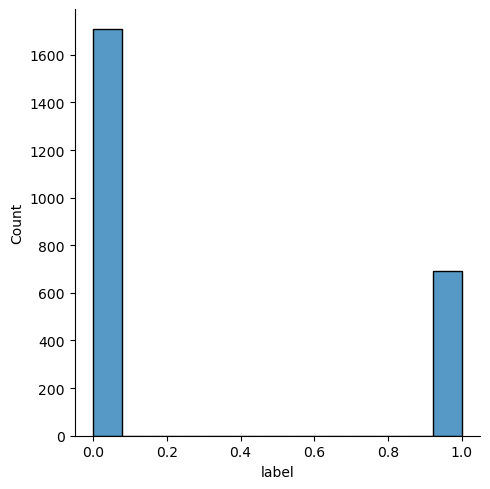

In [18]:
sns.displot(df['label'])

## An overlook to our data sources

c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x300 with 0 Axes>

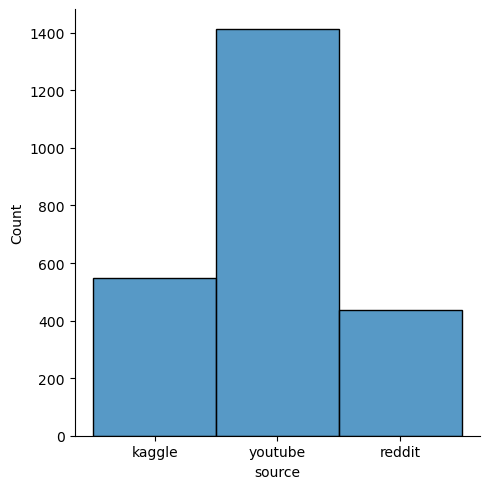

In [17]:
plt.figure(figsize=(12,3))
sns.displot(df['source'])

## Splitting the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_train, df_test = train_test_split(df)

In [21]:
df_train.shape

(1798, 5)

In [22]:
df_test.shape

(600, 5)

c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


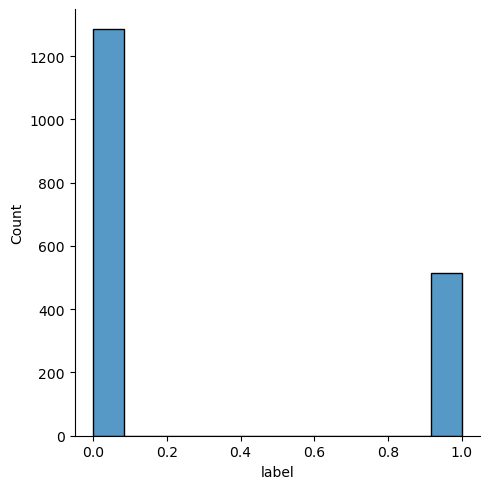

In [31]:
sns.displot(df_train['label'])

c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aliki\anaconda3\envs\NLPProject\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


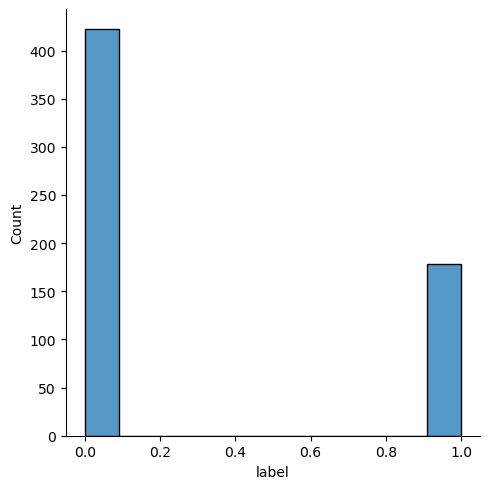

In [24]:
sns.displot(df_test['label'])

## Model definition